In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Problem 3a

In [159]:
sum8 = pd.read_csv('./sum/results/8/summation.log')
sum16 = pd.read_csv('./sum/results/16/summation.log')
sum32 = pd.read_csv('./sum/results/32/summation.log')
sum64 = pd.read_csv('./results/64/summation.log')

matvec8 = pd.read_csv('./results/8/matrixvector.log')
matvec16 = pd.read_csv('./results/16/matrixvector.log')
matvec32 = pd.read_csv('./results/32/matrixvector.log')
matvec64 = pd.read_csv('./results/64/matrixvector.log')

matmat8 = pd.read_csv('./results/8/matrixmatrix.log')
matmat16 = pd.read_csv('./results/16/matrixmatrix.log')
matmat32 = pd.read_csv('./results/32/matrixmatrix.log')
matmat64 = pd.read_csv('./results/64/matrixmatrix.log')

sums = [sum8,sum16,sum32,sum64]
matvecs = [matvec8,matvec16,matvec32,matvec64]
matmats = [matmat8,matmat16,matmat32,matmat64]
results = sums+matvecs+matmats

for df in results:
  for k in df.keys():
    if 'par' in k:
      df[k+'-speedup'] = df.sequential / df[k]
    
for p in [8,16,32,64]:
  for t in ['sum', 'matvec', 'matmat']:
    df = eval('{}{}'.format(t,p))
    for k in df.keys():
      if 'par' in k and 'speedup' not in k:
        df[k+'-efficiency'] = df[k+'-speedup'] / p

In [158]:
sum32

N  sequential  parallel-v1  parallel-v2  parallel-v1-speedup  \
0      64           1         8291         8704             0.000121   
1    1024          13         9616        12589             0.001352   
2   65536         797        10402         8863             0.076620   
3   92681        1132        10403         8976             0.108815   
4  131072        1599        10462        12605             0.152839   

   parallel-v2-speedup  parallel-v1-efficiency  parallel-v2-efficiency  
0             0.000115                0.000004                0.000004  
1             0.001033                0.000042                0.000032  
2             0.089924                0.002394                0.002810  
3             0.126114                0.003400                0.003941  
4             0.126854                0.004776                0.003964

In [163]:
sum32

N  sequential  parallel-v1  parallel-v2  parallel-v1-speedup  \
0         64           1        11882        15519             0.000084   
1       1024          13        10976        18678             0.001184   
2    1048576       13006        12342        20417             1.053800   
3    4194304       52003        17700        25198             2.938023   
4   16777216      207881        44631        38560             4.657772   
5   67108864      833274       128360       138772             6.491695   
6  268435456     3331086       503485       429020             6.616058   

   parallel-v2-speedup  parallel-v1-efficiency  parallel-v2-efficiency  
0             0.000064                0.000003                0.000002  
1             0.000696                0.000037                0.000022  
2             0.637018                0.032931                0.019907  
3             2.063775                0.091813                0.064493  
4             5.391105                0.145555                0.168472  
5             6.004626                0.202865                0.187645  
6             7.764407                0.206752                0.242638

In [166]:
sum16

N  sequential  parallel-v1  parallel-v2  parallel-v1-speedup  \
0         64           1          774           58             0.001292   
1       1024          13          789           52             0.016477   
2    1048576       13010         1652          859             7.875303   
3    4194304       51976         4195         3328            12.389988   
4   16777216      207871        16122        15297            12.893624   
5   67108864      832193        60864        59844            13.672992   
6  268435456     3142396       235503       234541            13.343337   

   parallel-v2-speedup  parallel-v1-efficiency  parallel-v2-efficiency  
0             0.017241                0.000081                0.001078  
1             0.250000                0.001030                0.015625  
2            15.145518                0.492206                0.946595  
3            15.617788                0.774374                0.976112  
4            13.589004                0.805851                0.849313  
5            13.906039                0.854562                0.869127  
6            13.398067                0.833959                0.837379

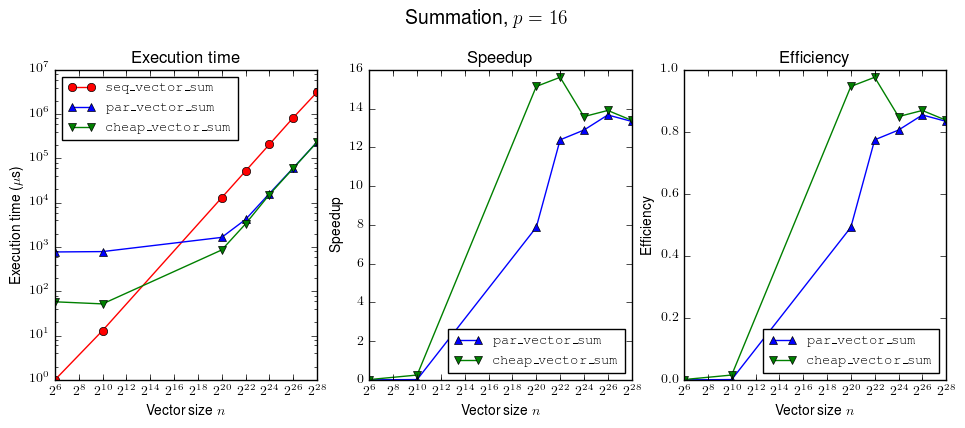

In [216]:
plt.figure(figsize=(11.5,4))
plt.suptitle('Summation, $p=16$', y=1.05, fontsize=14)
plt.subplot(132)
plt.title('Speedup')
plt.plot(sum16.N, sum16['parallel-v1-speedup'], marker='^', label=r'\texttt{par\_vector\_sum}', color='blue')
plt.plot(sum16.N, sum16['parallel-v2-speedup'], marker='v', label=r'\texttt{cheap\_vector\_sum}', color='green')
plt.ylabel('Speedup')
plt.xlabel('Vector size $n$')
plt.xscale('log', basex=2)

plt.legend(loc='best',fontsize=10)

plt.subplot(133)
plt.title('Efficiency')
plt.plot(sum16.N, sum16['parallel-v1-efficiency'], marker='^', label=r'\texttt{par\_vector\_sum}', color='blue')
plt.plot(sum16.N, sum16['parallel-v2-efficiency'], marker='v', label=r'\texttt{cheap\_vector\_sum}', color='green')
plt.ylabel('Efficiency')
plt.xlabel('Vector size $n$')
plt.xscale('log', basex=2)
plt.legend(loc='best',fontsize=10)

plt.subplot(131)
plt.title('Execution time')
plt.plot(sum16.N, sum16['sequential'], marker='o', label=r'\texttt{seq\_vector\_sum}', color='red')
plt.plot(sum16.N, sum16['parallel-v1'], marker='^', label=r'\texttt{par\_vector\_sum}', color='blue')
plt.plot(sum16.N, sum16['parallel-v2'], marker='v', label=r'\texttt{cheap\_vector\_sum}', color='green')
plt.ylabel('Execution time ($\mu$s)')
plt.xlabel('Vector size $n$')
plt.yscale('log')
plt.xscale('log', basex=2)
plt.legend(loc='best',fontsize=10)
plt.show()

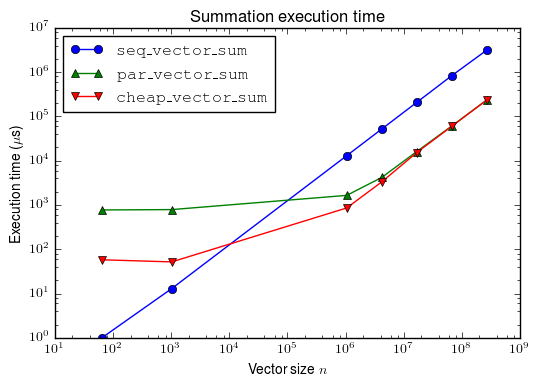

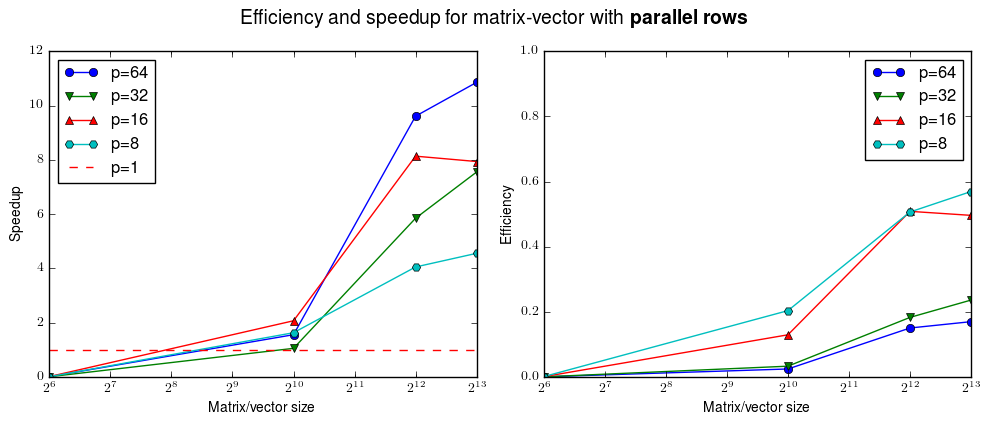

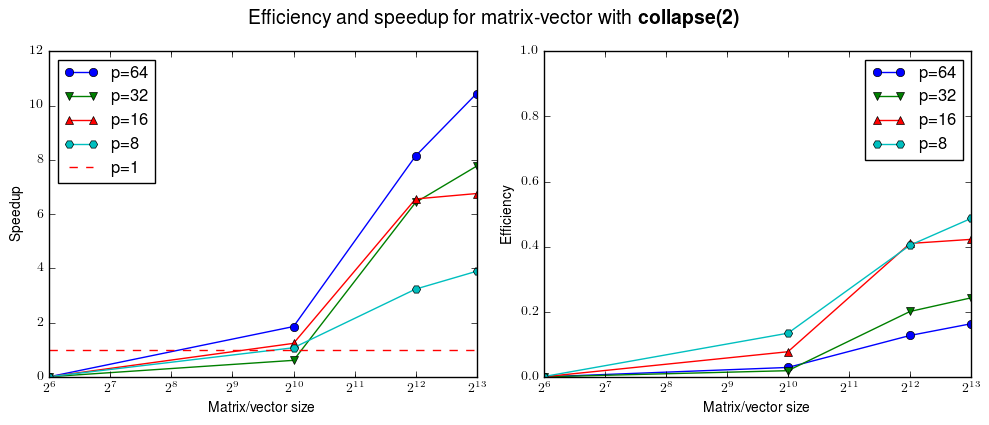

In [221]:
from itertools import cycle

def plot_speedup_efficiency(algo, title, xlabel, prefix,ps=[64,32,16,8]):
  plt.figure(figsize=(10,4))
  plt.suptitle(title, y=1.05, fontsize=14)
  markers = cycle(['o','v','^','H'])
  plt.subplot(121)
  for p in ps:
    df = eval('{}{}'.format(prefix,p))
    plt.plot(df.N, df['{}-speedup'.format(algo)], marker=next(markers), label='p={}'.format(p))
  plt.axhline(1, ls='--', color='red', label='p=1')
  plt.legend(loc='best')
  plt.xlabel(xlabel)
  plt.ylabel('Speedup')
  
  plt.xscale('log', basex=2)
  #plt.ylim(0,42)

  plt.subplot(122)
  for p in [64,32,16,8]:
    df = eval('{}{}'.format(prefix,p))
    plt.plot(df.N, df['{}-efficiency'.format(algo)], marker=next(markers), label='p={}'.format(p))
  plt.legend(loc='best')
  plt.xlabel(xlabel)
  plt.ylabel('Efficiency')
  
  plt.ylim(0,1)
  plt.xscale('log', basex=2)

  plt.tight_layout()
  plt.show()
  
def plot_matrix_vector_algo(algo, title):
  plot_speedup_efficiency(algo, title, 'Matrix/vector size', 'matvec')
  
def plot_matrix_matrix_algo(algo, title):
  plot_speedup_efficiency(algo, title, 'Matrix size', 'matmat')

plot_matrix_vector_algo('parallel-v1', r'Efficiency and speedup for matrix-vector with \textbf{parallel rows}')

plot_matrix_vector_algo('parallel-v2', r'Efficiency and speedup for matrix-vector with \textbf{collapse(2)}')

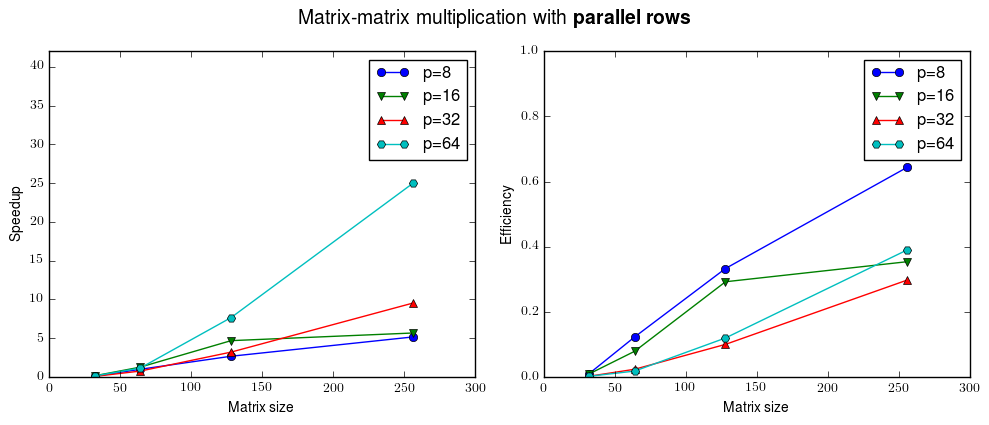

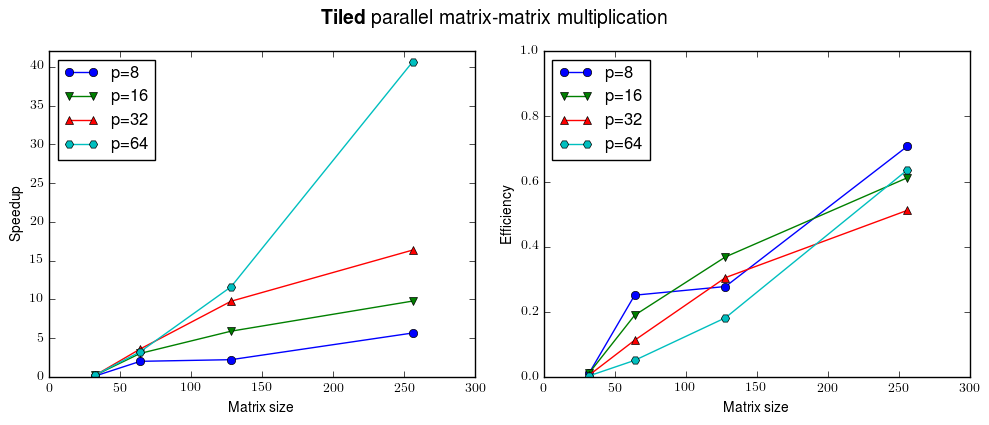

In [148]:
plot_matrix_matrix_algo('par1', r'Matrix-matrix multiplication with \textbf{parallel rows}')

#plot_matrix_matrix_algo('par2', r'Matrix-matrix multiplication with \textbf{collapse(2)}')

plot_matrix_matrix_algo('tiled-par', r'\textbf{Tiled} parallel matrix-matrix multiplication')

In [103]:
matmat16

N  sequential  dgemm   par1   par2   par3  tiled-seq  tiled-par  \
0   32         701    118   4734   4425   5980        746       3566   
1   64        7092    792   5634   5274   7154       6342       2340   
2  128       56132   4891  12003   6614  15430      32411       9515   
3  256      328202  20933  57964  39389  60504     262376      33541   

   par1-speedup  par2-speedup  par3-speedup  tiled-par-speedup  \
0      0.148078      0.158418      0.117224           0.196579   
1      1.258786      1.344710      0.991334           3.030769   
2      4.676498      8.486846      3.637848           5.899317   
3      5.662170      8.332326      5.424468           9.785099   

   par1-efficiency  par2-efficiency  par3-efficiency  tiled-par-efficiency  
0         0.009255         0.009901         0.007327              0.012286  
1         0.078674         0.084044         0.061958              0.189423  
2         0.292281         0.530428         0.227366              0.368707  
3         0.353886         0.520770         0.339029              0.611569

In [223]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(matmat64.N, matmat64['sequential'], marker='o', label='Sequential (Naive)')
plt.plot(matmat64.N, matmat64['tiled-seq'], marker='o', label='Sequential (Tiled)', color='blue', alpha=0.5)
plt.plot(matmat64.N, matmat64['dgemm'], marker='^', label='$\\texttt{blas\_dgemm}$', color='green')
plt.plot(matmat64.N, matmat64['par1'], marker='v', label='Parallel (Rows)', color='red', alpha=0.5)
plt.plot(matmat64.N, matmat64['tiled-par'], marker='v', label='Parallel (Tiled)', color='red')
plt.title('Matrix-matrix runtimes, $p=64$')
plt.ylabel('Runtime ($\mu$s)')
plt.xlabel('Matrix size')
plt.yscale('log')
plt.xscale('log', basex=2)
plt.legend(loc='best', fontsize=10)
plt.subplot(122)
def gflops(usecs):
  return 2*(matmat64.N**3)/(1e9 * usecs * 1e-6)

plt.plot(matmat64.N, gflops(matmat64['sequential']), marker='o', label='Sequential (Naive)')
plt.plot(matmat64.N, gflops(matmat64['tiled-seq']), marker='o', label='Sequential (Tiled)', color='blue', alpha=0.5)
plt.plot(matmat64.N, gflops(matmat64['dgemm']), marker='^', label='$\\texttt{blas\_dgemm}$', color='green')
plt.plot(matmat64.N, gflops(matmat64['par1']), marker='v', label='Parallel (Rows)', color='red', alpha=0.5)
plt.plot(matmat64.N, gflops(matmat64['tiled-par']), marker='v', label='Parallel (Tiled)', color='red')
plt.title('Matrix-matrix throughputs, $p=64$')
plt.ylabel('GFlop/s')
plt.xlabel('Matrix size')
plt.yscale('log')
plt.xscale('log', basex=2)
plt.legend(loc='best', fontsize=10)
plt.show()

In [243]:
matmat64_2 = pd.read_csv('./foo/results/64/matrixmatrix.log')
matmat32_2 = pd.read_csv('./bar/32/matrixmatrix.log')

In [282]:
def matrix_runtime_plot(df):
  plt.figure(figsize=(14,4))
  plt.suptitle('Matrix-matrix results, $p=b=32$', y=1.05, fontsize=14)
  plt.subplot(131)
  plt.plot(df.N, df['sequential'], marker='o', label='Sequential (Naive)')
  plt.plot(df.N, df['tiled-seq'], marker='o', label='Sequential (Tiled)', color='blue', alpha=0.5)
  plt.plot(df.N, df['dgemm'], marker='^', label='$\\texttt{blas\_dgemm}$', color='green')
  plt.plot(df.N, df['par1'], marker='v', label='Parallel (Rows)', color='red', alpha=0.5)
  plt.plot(df.N, df['tiled-par'], marker='v', label='Parallel (Tiled)', color='red')
  plt.plot(df.N, df.N**3, label=r'n^3', color='blue', alpha=0.5, ls='--')
  plt.title('Runtimes')
  plt.ylabel('Runtime ($\mu$s)')
  plt.xlabel('Matrix size $n$')
  plt.yscale('log')
  plt.xscale('log', basex=2)
  plt.legend(loc='best', fontsize=10)
  plt.subplot(132)
  def gflops(usecs):
    return 2*(df.N**3)/(1e9 * usecs * 1e-6)

  plt.plot(df.N, gflops(df['sequential']), marker='o', label='Sequential (Naive)')
  plt.plot(df.N, gflops(df['tiled-seq']), marker='o', label='Sequential (Tiled)', color='blue', alpha=0.5)
  plt.plot(df.N, gflops(df['dgemm']), marker='^', label='$\\texttt{blas\_dgemm}$', color='green')
  plt.plot(df.N, gflops(df['par1']), marker='v', label='Parallel (Rows)', color='red', alpha=0.5)
  plt.plot(df.N, gflops(df['tiled-par']), marker='v', label='Parallel (Tiled)', color='red')
  plt.title('Throughputs')
  plt.ylabel('GFlop/s')
  plt.xlabel('Matrix size $n$')
  plt.yscale('log')
  plt.xscale('log', basex=2)
  plt.legend(loc='best', fontsize=10)
  
  plt.subplot(133)
  plt.title('Speedup vs. Sequential Tiled')
  plt.plot(df.N, df['par1-speedup'], marker='^', label=r'Parallel (Rows)', color='red', alpha=0.5)
  plt.plot(df.N, df['par2-speedup'], marker='H', label=r'collapse(2)', color='red', alpha=0.5)
  plt.plot(df.N, df['par3-speedup'], marker='o', label=r'collapse(2) + reduction', color='red', alpha=0.5)
  plt.plot(df.N, df['tiled-par-speedup'], marker='v', label=r'Parallel (Tiled)', color='red')
  plt.ylabel('Speedup')
  plt.xlabel('Matrix size $n$')
  plt.xscale('log', basex=2)
  plt.legend(loc='best',fontsize=10)
  plt.tight_layout()
  plt.show()
  
matrix_runtime_plot(matmat32_2)

In [251]:
matmat32_2 = pd.read_csv('./bar/32/matrixmatrix.log')
for df in [matmat32_2]:
  for k in df.keys():
    if 'par' in k:
      df[k+'-speedup'] = df['tiled-seq'] / df[k]
      df[k+'-efficiency'] = df[k+'-speedup'] / 32

In [252]:
matmat32_2

N  sequential     dgemm      par1      par2      par3  tiled-seq  \
0    32         696       132      4146      2449      6773        397   
1    64        6952       796      6405      2607      7414       3453   
2   128       30103      2787      9068      4860      9128      40899   
3   256      561613     38927     26351     28843     26993     476938   
4   512     5357098    263712    258880    236748    209703    3274324   
5  1024    63800804   2442807   3846836   3993834   2459939   18533675   
6  2048   963905423  30153004  46843901  38359594  36280292  173378243   

   tiled-par  par1-speedup  par1-efficiency  par2-speedup  par2-efficiency  \
0       3006      0.095755         0.002992      0.162107         0.005066   
1       1835      0.539110         0.016847      1.324511         0.041391   
2       5792      4.510256         0.140945      8.415432         0.262982   
3      26123     18.099427         0.565607     16.535659         0.516739   
4     148678     12.648038         0.395251     13.830419         0.432201   
5    1022418      4.817901         0.150559      4.640572         0.145018   
6    7414261      3.701191         0.115662      4.519814         0.141244   

   par3-speedup  par3-efficiency  tiled-par-speedup  tiled-par-efficiency  
0      0.058615         0.001832           0.132069              0.004127  
1      0.465740         0.014554           1.881744              0.058804  
2      4.480609         0.140019           7.061291              0.220665  
3     17.668951         0.552155          18.257398              0.570544  
4     15.614102         0.487941          22.022922              0.688216  
5      7.534201         0.235444          18.127297              0.566478  
6      4.778855         0.149339          23.384427              0.730763

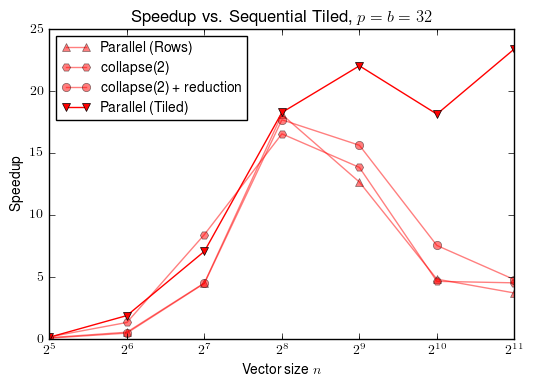

In [273]:
plt.title('Speedup vs. Sequential Tiled, $p=b=32$')
plt.plot(matmat32_2.N, matmat32_2['par1-speedup'], marker='^', label=r'Parallel (Rows)', color='red', alpha=0.5)
plt.plot(matmat32_2.N, matmat32_2['par2-speedup'], marker='H', label=r'collapse(2)', color='red', alpha=0.5)
plt.plot(matmat32_2.N, matmat32_2['par3-speedup'], marker='o', label=r'collapse(2) + reduction', color='red', alpha=0.5)
plt.plot(matmat32_2.N, matmat32_2['tiled-par-speedup'], marker='v', label=r'Parallel (Tiled)', color='red')
plt.ylabel('Speedup')
plt.xlabel('Vector size $n$')
plt.xscale('log', basex=2)
plt.legend(loc='best',fontsize=10)
plt.show()